# Train and test split

In [1]:
import numpy as np

# Load images from .npy file
images = np.load('MNIST/mnist_images.npy')
labels = np.load('MNIST/mnist_labels.npy')

In [2]:
# Splitting our data into train and test set
# Form a training set (first 1000 instances)
train_images = images[:1000,:]
train_labels = labels[:1000]

# Form a test set (second 1000 instances)
test_images = images[1000:2000,:]
test_labels = labels[1000:2000]

Let's use functions that we have implemented in the previous exercise

In [3]:
def dist(img1, img2):
    return np.sum(np.abs(img1 - img2))

Reuse the code from the previous lesson and make function `classify_knn` work only with training images

In [12]:
from scipy import stats
def classify_knn(unk, k):
    all_distances = np.asarray([dist(unk, img) for img in train_images])
    knn = np.argpartition(all_distances, k)[0:k]
    prediction = stats.mode(knn).mode[0]
    return train_labels[prediction]

Seems like Nearest Neighbor works, indeed! How about trying applying it on all 1000 test images and then estimating it's effectivness?

**Exercise!** Classify all test images and store them into a separate variable `test_predicted`, choose `k` = 10

In [15]:
test_predicted = [classify_knn(img, k = 10) for img in test_images]

How many instances from the test set the classifier has predicted correctly?

In [19]:
n_correct = np.sum(test_predicted == test_labels)
print "Number of correctly predicted images is %d" % (n_correct)

Number of correctly predicted images is 725


Now we will use **`accuracy`** (namely, proportion of correctly guessed classes) to estimate the performance of our nearest neighbor classifier. For that we need to divide number of correctly predicted images by total number of images.

In [20]:
nn_accuracy = float(n_correct)/len(test_labels) # in Python 2.7 which I am using / is integer division
print "Final accuracy of our nearest neighbor classifier is %f. Not bad!" % (nn_accuracy)

Final accuracy of our nearest neighbor classifier is 0.725000. Not bad!


Let's examine some of the missclassified examples, but first let's set up matplotlib settings:

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

Play around with the index of misclassified instance to visually examine some of the difficult cases

This image with 8 was incorrectly predicted as 5


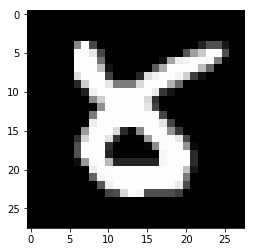

In [31]:
missclassified = np.where(test_predicted != test_labels)[0] # remember function `which` in R?

# Set an index of missclassified instance you want to examine
index = 9

# Plot this instance as usually
img_matrix = test_images[missclassified[index]].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));
print "This image with %d was incorrectly predicted as %d" % (test_labels[missclassified[index]], test_predicted[missclassified[index]])

## Scikit-learn package

Now let us use the Scikit-Learn package to train and test the Nearest Neigbor classifier, avoiding the need to implement it ourselves.

Most of the classifiers that we are going to use are implemented in scikit-learn, for example KNN that we have implemented in the previous lesson is available under the name `KNNeiborsClassifier`. All you need to do is to import it from `sklearn` (this a short name for scikit-learn).

In [32]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

Let's create an instance of the KNN classifier by calling a `KNeighborsClassifier()` function. As an input parameter you can specify `k`. For example 5 nearest neighbour classifier is created like this:

In [35]:
model = KNeighborsClassifier(10)

Most of the scikit-learn models have method `fit` that let you train the classifier given training instances and correct labels:

In [36]:
model.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Use learned nearest neighbor classifier (model) for predicting test images

In [37]:
test_predicted = model.predict(test_images)

Evaluate our classifier's performance in an old school way:

In [38]:
np.float(np.sum(test_predicted == test_labels))/len(test_labels)

0.85

or even easier

In [39]:
model.score(test_images, test_labels)

0.84999999999999998

A useful way to study classification results is by examining the *confusion matrix*, which counts pairs (true_class, predicted_class):

In [40]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(test_labels, test_predicted)

[[ 96   1   0   0   1   0   0   1   0   0]
 [  0 112   0   0   0   0   0   0   1   0]
 [  1  25  55   2   1   1   4   2   2   1]
 [  4   4   0  92   0   1   1   2   1   3]
 [  1   4   0   0  71   1   1   0   0  15]
 [  3   1   0   5   0  77   5   0   1   4]
 [  1   1   0   0   0   0  99   0   0   0]
 [  0   3   0   0   2   0   0  90   0   8]
 [  1   4   0   8   1   5   4   2  72   2]
 [  2   0   1   1   1   0   0   3   0  86]]


We see that digit 4 is often confused with 9, which sounds reasonable. We can also plot the matrix as follows.

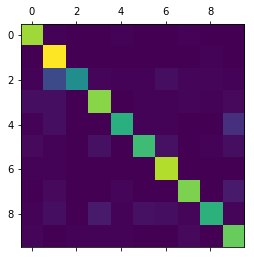

In [41]:
plt.matshow(confusion_matrix(test_labels, test_predicted))

What about other classifiers like SVM, decision tree and random forest? They are all in scikit-learn!

In [42]:
# Import SVM method
from sklearn import svm

# Train an SVM model
model = svm.SVC(kernel='linear')
model.fit(train_images, train_labels)

# Test trained model
model.score(test_images, test_labels)

0.88900000000000001

**Exercise**: Find and train a random forest algorithm on training data and test it on test images. Report final accuracy.

In [45]:
# Import Random Forest method
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(train_images, train_labels)

# Test trained model
model.score(test_images, test_labels)

0.91500000000000004